# EDA


## training data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import math

In [52]:
train = pd.read_csv('../data/train_clean.csv')

In [53]:
train_no_spec_dup = train.drop_duplicates(subset=['date', 'address', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'dayofweek'])

In [54]:
train_no_spec_dup

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,dayofweek
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,22,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,22,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,22,1
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007,5,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1,2013,9,39,3
9689,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0,2013,9,39,3
9690,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0,2013,9,39,3
9691,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0,2013,9,39,3


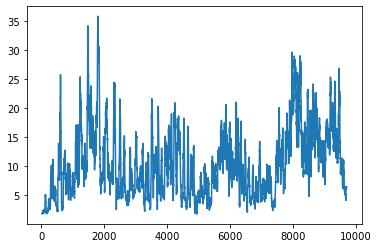

In [6]:
plt.plot(train_no_spec_dup['nummosquitos'].rolling(28).mean())

### `date`, (`year`, `month`, `week`, `dayofweek`)

In [7]:
# check to see if there are missing dates
missing_dates = pd.date_range(start = train_no_spec_dup['date'][0], end = train_no_spec_dup['date'][9692] ).difference(train['date'])

In [21]:
# make the values into a dataframe
missing_dates = pd.DataFrame(missing_dates, columns=['missing_dates'])

In [23]:
# calculate the year, month, week, day of week columns for our missing dates
missing_dates['year'] = missing_dates['missing_dates'].apply(lambda x: x.year)
missing_dates['month'] = missing_dates['missing_dates'].apply(lambda x: x.month)
missing_dates['week'] = missing_dates['missing_dates'].apply(lambda x: x.week)
missing_dates['dayofweek'] = missing_dates['missing_dates'].apply(lambda x: x.dayofweek)

In [38]:
# Checking the value count for missing years
missing_dates['year'].value_counts().sort_index()

2007    184
2008    366
2009    339
2010    365
2011    347
2012    366
2013    251
Name: year, dtype: int64

Our training data is missing data from each year. In particular, it looks like it is completely missing data from 2008, 2010, and 2012 as there are at least 365 days of missing dates in each of those years.

Just to confirm our observations, we can take the value counts from our training data itself.


In [37]:
# checking the value counts for year in our training data
train['year'].value_counts().sort_index()

2007    3231
2009    2139
2011    2000
2013    2323
Name: year, dtype: int64

In [50]:
train_left['year'].value_counts().sort_index()

2007    2935
2009    1957
2011    1864
2013    2238
Name: year, dtype: int64

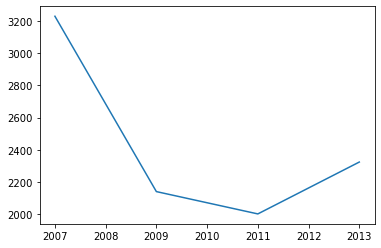

In [49]:
plt.plot(train['year'].value_counts().sort_index())

As we can see, 2008, 2010, and 2012 are completely missing from our training data.

In [42]:
# checking the value count for missing months
missing_dates['month'].value_counts().sort_index()

1     186
2     170
3     186
4     180
5     187
6     189
7     196
8     191
9     184
10    183
11    180
12    186
Name: month, dtype: int64

Missing months are roughly evenly distributed.

In [43]:
# checking the value counts for month in our training data
train['month'].value_counts().sort_index()

5       83
6     1487
7     2427
8     3308
9     2112
10     276
Name: month, dtype: int64

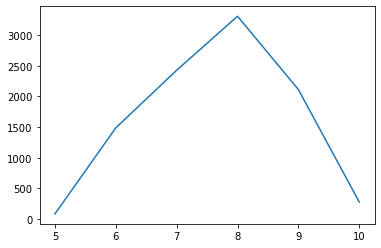

In [48]:
plt.plot(train['month'].value_counts().sort_index())

In [51]:
train_left['month'].value_counts().sort_index()

5       76
6     1395
7     2257
8     3049
9     1958
10     259
Name: month, dtype: int64

However, the months in our training data is very much skewed in an almost normal distriubtion, with a far greater sample of August and the tails at March and October.

In [33]:
# checking the value count for missing weeks
missing_dates['week'].value_counts().sort_index()

1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     42
9     42
10    42
11    42
12    42
13    42
14    42
15    42
16    42
17    42
18    42
19    42
20    42
21    42
22    46
23    43
24    46
25    45
26    42
27    47
28    42
29    44
30    43
31    42
32    43
33    43
34    44
35    43
36    44
37    45
38    43
39    41
40    40
41    41
42    42
43    42
44    42
45    42
46    42
47    42
48    42
49    42
50    42
51    42
52    42
53     7
Name: week, dtype: int64

Missing weeks are roughly evenly distributed, with the only exception to be the 53rd week which would be due to leap years.

In [44]:
# checking the value counts for week in our training data
train['week'].value_counts().sort_index()

22      83
23     376
24     316
25     329
26     450
27      90
28     941
29     554
30     653
31    1087
32     678
33     700
34     724
35     434
36     378
37     524
38     646
39     454
40     250
41      26
Name: week, dtype: int64

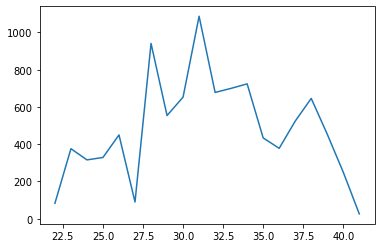

In [47]:
plt.plot(train['week'].value_counts().sort_index())

The training data is highly irregular in terms of weeks. 

In [45]:
# checking the value count for missing days of week
missing_dates['dayofweek'].value_counts().sort_index()

0    317
1    319
2    320
3    307
4    295
5    330
6    330
Name: dayofweek, dtype: int64

In [46]:
# checking the value counts for days of week in our training data
train['dayofweek'].value_counts().sort_index()

0    1210
1     983
2    1438
3    2403
4    3659
Name: dayofweek, dtype: int64